In [1]:
import cv2
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义可视化图像函数
def look_img(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [3]:
#导入solution
mp_pose = mp.solutions.pose

#导入绘图函数
mp_drawing = mp.solutions.drawing_utils

#导入模型
pose = mp_pose.Pose(
    static_image_mode=True,         #是静态图片还是连续视频帧
    model_complexity=2,             #选择人体姿势关键点检测模型，0性能差但是快，2性能好但是慢，1介于两者之间
    smooth_landmarks=True,          #是否平滑关键点
    enable_segmentation=True,       #是否人体抠图
    smooth_segmentation=True,
    min_detection_confidence=0.5,   #置信度阈值
    min_tracking_confidence=0.5,    #追踪阈值
)

In [4]:
img = cv2.imread('test.jpg')

img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

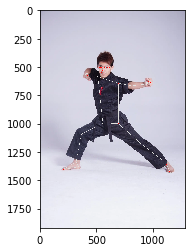

In [5]:
#可视化
mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
look_img(img)

##### 获取左膝盖关键点像素坐标

In [6]:
h = img.shape[0]
w = img.shape[1]

In [7]:
results.pose_landmarks

landmark {
  x: 0.43170350790023804
  y: 0.2775278091430664
  z: -0.6325309872627258
  visibility: 1.0
}
landmark {
  x: 0.4449617266654968
  y: 0.263005793094635
  z: -0.6008321642875671
  visibility: 0.9999998807907104
}
landmark {
  x: 0.45448416471481323
  y: 0.26234424114227295
  z: -0.6012418270111084
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4647213816642761
  y: 0.26203110814094543
  z: -0.6008548140525818
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4234493374824524
  y: 0.2638671398162842
  z: -0.5768621563911438
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4170674681663513
  y: 0.26340895891189575
  z: -0.5773522257804871
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4112139344215393
  y: 0.26276418566703796
  z: -0.5774286985397339
  visibility: 0.9999998807907104
}
landmark {
  x: 0.47898226976394653
  y: 0.263754665851593
  z: -0.37337642908096313
  visibility: 0.9999998807907104
}
landmark {
  x: 0.4128172993659973
  y: 0.261045128107070

In [8]:
# 左膝盖关键点像素坐标
cx = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x *w)
cy = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y *h)
cz = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].z

In [9]:
print(cx,cy,cz)

884 1171 -0.1799449920654297


In [10]:
#绘制圆：图像、圆心坐标、半径、BGR颜色、最后一个参数为线宽、-1表示填充
img = cv2.circle(img,(cx,cy),15,(255,0,0),-1)

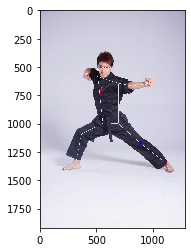

In [11]:
look_img(img)

In [12]:
#可视化关键点及骨架连线
mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
for i in range(33):
    #获取关键点的三维坐标
    cx = int(results.pose_landmarks.landmark[i].x *w)
    cy = int(results.pose_landmarks.landmark[i].y *h)
    cz = results.pose_landmarks.landmark[i].z

    radius = 10

    if i==0:#鼻尖
        img = cv2.circle(img,(cx,cy),radius,(0,0,255),-1)
    elif i in [11,12]: #肩膀
        img = cv2.circle(img,(cx,cy),radius,(223,155,6),-1)
    elif i in [23,24]: #髋关节
        img = cv2.circle(img,(cx,cy),radius,(1,240,255),-1)
    elif i in [13,14]: #胳膊肘
        img = cv2.circle(img,(cx,cy),radius,(140,47,240),-1)
    elif i in [25,26]: #膝盖
        img = cv2.circle(img,(cx,cy),radius,(0,0,255),-1)
    elif i in [15,16,27,28]: #手腕和脚腕
        img = cv2.circle(img,(cx,cy),radius,(223,155,60),-1)
    elif i in [17,19,21]: #左手
        img = cv2.circle(img,(cx,cy),radius,(94,218,121),-1)
    elif i in [18,20,22]: #右手
        img = cv2.circle(img,(cx,cy),radius,(16,144,247),-1)
    elif i in [27,19,31]: #左脚
        img = cv2.circle(img,(cx,cy),radius,(29,123,243),-1)
    elif i in [28,30,32]: #右脚
        img = cv2.circle(img,(cx,cy),radius,(193,182,255),-1)
    elif i in [9,10]: #嘴
        img = cv2.circle(img,(cx,cy),radius,(205,235,255),-1)
    elif i in [1,2,3,4,5,6,7,8]: #眼及脸颊
        img = cv2.circle(img,(cx,cy),radius,(94,218,121),-1)
    else:
        img = cv2.circle(img,(cx,cy),radius,(0,255,0),-1)
    

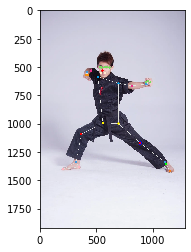

In [13]:
look_img(img)

##### 整理代码

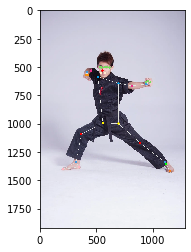

True

In [14]:
import cv2
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
%matplotlib inline

#定义可视化图像函数
def look_img(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

#导入solution
mp_pose = mp.solutions.pose

#导入绘图函数
mp_drawing = mp.solutions.drawing_utils

#导入模型
pose = mp_pose.Pose(
    static_image_mode=True,         #是静态图片还是连续视频帧
    model_complexity=2,             #选择人体姿势关键点检测模型，0性能差但是快，2性能好但是慢，1介于两者之间
    smooth_landmarks=True,          #是否平滑关键点
    enable_segmentation=True,       #是否人体抠图
    smooth_segmentation=True,
    min_detection_confidence=0.5,   #置信度阈值
    min_tracking_confidence=0.5,    #追踪阈值
)

img = cv2.imread('test.jpg')

img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

if results.pose_landmarks:#若检测出人体关键点
    #可视化关键点及骨架连线
    mp_drawing.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
    for i in range(33):
        #获取关键点的三维坐标
        cx = int(results.pose_landmarks.landmark[i].x *w)
        cy = int(results.pose_landmarks.landmark[i].y *h)
        cz = results.pose_landmarks.landmark[i].z

        radius = 10

        if i==0:#鼻尖
            img = cv2.circle(img,(cx,cy),radius,(0,0,255),-1)
        elif i in [11,12]: #肩膀
            img = cv2.circle(img,(cx,cy),radius,(223,155,6),-1)
        elif i in [23,24]: #髋关节
            img = cv2.circle(img,(cx,cy),radius,(1,240,255),-1)
        elif i in [13,14]: #胳膊肘
            img = cv2.circle(img,(cx,cy),radius,(140,47,240),-1)
        elif i in [25,26]: #膝盖
            img = cv2.circle(img,(cx,cy),radius,(0,0,255),-1)
        elif i in [15,16,27,28]: #手腕和脚腕
            img = cv2.circle(img,(cx,cy),radius,(223,155,60),-1)
        elif i in [17,19,21]: #左手
            img = cv2.circle(img,(cx,cy),radius,(94,218,121),-1)
        elif i in [18,20,22]: #右手
            img = cv2.circle(img,(cx,cy),radius,(16,144,247),-1)
        elif i in [27,19,31]: #左脚
            img = cv2.circle(img,(cx,cy),radius,(29,123,243),-1)
        elif i in [28,30,32]: #右脚
            img = cv2.circle(img,(cx,cy),radius,(193,182,255),-1)
        elif i in [9,10]: #嘴
            img = cv2.circle(img,(cx,cy),radius,(205,235,255),-1)
        elif i in [1,2,3,4,5,6,7,8]: #眼及脸颊
            img = cv2.circle(img,(cx,cy),radius,(94,218,121),-1)
        else:
            img = cv2.circle(img,(cx,cy),radius,(0,255,0),-1)
    look_img(img)
else:
    print('从人体中未检测出人体关键点！')

cv2.imwrite('D.jpg',img)